In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from scipy.stats import zscore 
import warnings
warnings.filterwarnings('ignore')

# Micro-Credit-Project


In this project we have details of cutomers to improve the selection of customers for the credit:

Build a model which can be used to predict in terms of a probability for each loan transaction.
Whether the customer will be paying back the loaned amount within 5 days of issuance of loan.
In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.





# Data file details

Variable = Definition

label = Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success,0:failure}.
msisdn = mobile number of user.
aon = age on cellular network in days.
daily_decr30 = Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah).
daily_decr90 = Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah).
rental30 = Average main account balance over last 30 days.
rental90 = Average main account balance over last 90 days.
last_rech_date_ma = Number of days till last recharge of main account.
last_rech_date_da = Number of days till last recharge of data account.
last_rech_amt_ma = Amount of last recharge of main account (in Indonesian Rupiah).
cnt_ma_rech30 = Number of times main account got recharged in last 30 days.
fr_ma_rech30 = Frequency of main account recharged in last 30 days.
sumamnt_ma_rech30 = Total amount of recharge in main account over last 30 days (in Indonesian Rupiah.
medianamnt_ma_rech30 = Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah).
medianmarechprebal30 = Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah).
cnt_ma_rech90 = Number of times main account got recharged in last 90 days.
fr_ma_rech90 = Frequency of main account recharged in last 90 days.
sumamnt_ma_rech90 = Total amount of recharge in main account over last 90 days (in Indonesian Rupee
medianamnt_ma_rech90 = Median of amount of recharges done in main account over last 90 days at user level (in Indonesian Rupee).
medianmarechprebal90 = Median of main account balance just before recharge in last 90 days at user level (in Indonesian Rupee).
cnt_da_rech30 = Number of times data account got recharged in last 30 days.
fr_da_rech30 = Frequency of data account recharged in last 30 days.
cnt_da_rech90 = Number of times data account got recharged in last 90 days.
fr_da_rech90 = Frequency of data account recharged in last 90 days.
cnt_loans30 = Number of loans taken by user in last 30 days.
amnt_loans30 = Total amount of loans taken by user in last 30 days.
maxamnt_loans30 = maximum amount of loan taken by the user in last 30 days.
medianamnt_loans30 = Median of amounts of loan taken by the user in last 30 days.
cnt_loans90 = Number of loans taken by user in last 90 days.
amnt_loans90 = Total amount of loans taken by user in last 90 days.
maxamnt_loans90 = maximum amount of loan taken by the user in last 90 days.
medianamnt_loans90 = Median of amounts of loan taken by the user in last 90 days.
payback30 = Average payback time in days over last 30 days.
payback90 = Average payback time in days over last 90 days.
pcircle = telecom circle.
pdate = date.







# Data Preprocessing


In [48]:
df = pd.read_excel(r'C:\Users\Hp\Desktop\Datafile_excel.xlsx')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [6]:
df.shape

(209593, 37)

In [7]:
df.dtypes

Unnamed: 0                       int64
label                            int64
msisdn                          object
aon                            float64
daily_decr30                   float64
daily_decr90                   float64
rental30                       float64
rental90                       float64
last_rech_date_ma              float64
last_rech_date_da              float64
last_rech_amt_ma                 int64
cnt_ma_rech30                    int64
fr_ma_rech30                   float64
sumamnt_ma_rech30                int64
medianamnt_ma_rech30           float64
medianmarechprebal30           float64
cnt_ma_rech90                    int64
fr_ma_rech90                     int64
sumamnt_ma_rech90                int64
medianamnt_ma_rech90           float64
medianmarechprebal90           float64
cnt_da_rech30                  float64
fr_da_rech30                   float64
cnt_da_rech90                    int64
fr_da_rech90                     int64
cnt_loans30              

In [8]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [9]:
#there is no  value null

<AxesSubplot:>

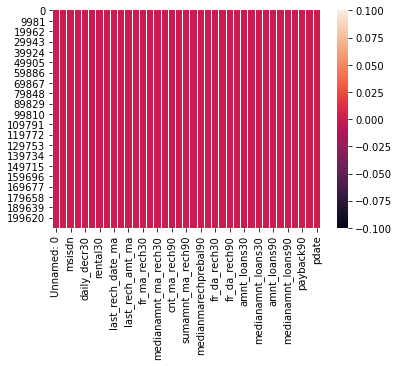

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [12]:
# ther are 209593 rows in the dataset
#the large difference between 75% and max shows the presence of outliers

# EDA - Exploratory Data Analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            209593 non-null  int64         
 1   label                 209593 non-null  int64         
 2   msisdn                209593 non-null  object        
 3   aon                   209593 non-null  float64       
 4   daily_decr30          209593 non-null  float64       
 5   daily_decr90          209593 non-null  float64       
 6   rental30              209593 non-null  float64       
 7   rental90              209593 non-null  float64       
 8   last_rech_date_ma     209593 non-null  float64       
 9   last_rech_date_da     209593 non-null  float64       
 10  last_rech_amt_ma      209593 non-null  int64         
 11  cnt_ma_rech30         209593 non-null  int64         
 12  fr_ma_rech30          209593 non-null  float64       
 13 

In [14]:
# Checking uniqueness
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [15]:
df.pcircle.unique()

array(['UPW'], dtype=object)


# Obersvation:


1. Unnamed column can be dropped as it is not necessary for prediction of loan repayment.
2. Also column pcircle can be dropped as it is not necessary for prediction of loan repayment.
3. Column msisdn and pdate are of type object which needs to be convered to float/date type.

In [16]:
# dropping Unnamed:0 and pcircle columns

df.drop(['Unnamed: 0','pcircle'], axis=1, inplace=True)
df.head(5)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22


In [17]:
df.shape

(209593, 35)

In [18]:
# Change data type of msisdn and pdate

df['pdate'] = str(df.pdate).strip('-')

df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0 2016-07-20\n1 2016-08-10\n2 ...
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0 2016-07-20\n1 2016-08-10\n2 ...
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0 2016-07-20\n1 2016-08-10\n2 ...
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0 2016-07-20\n1 2016-08-10\n2 ...
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0 2016-07-20\n1 2016-08-10\n2 ...


In [19]:
df.pdate.dtype

dtype('O')

# EDA

univariate 

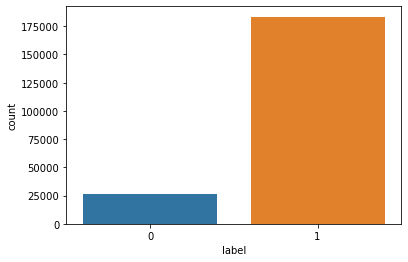

In [20]:
 sns.countplot(df['label']);

<AxesSubplot:>

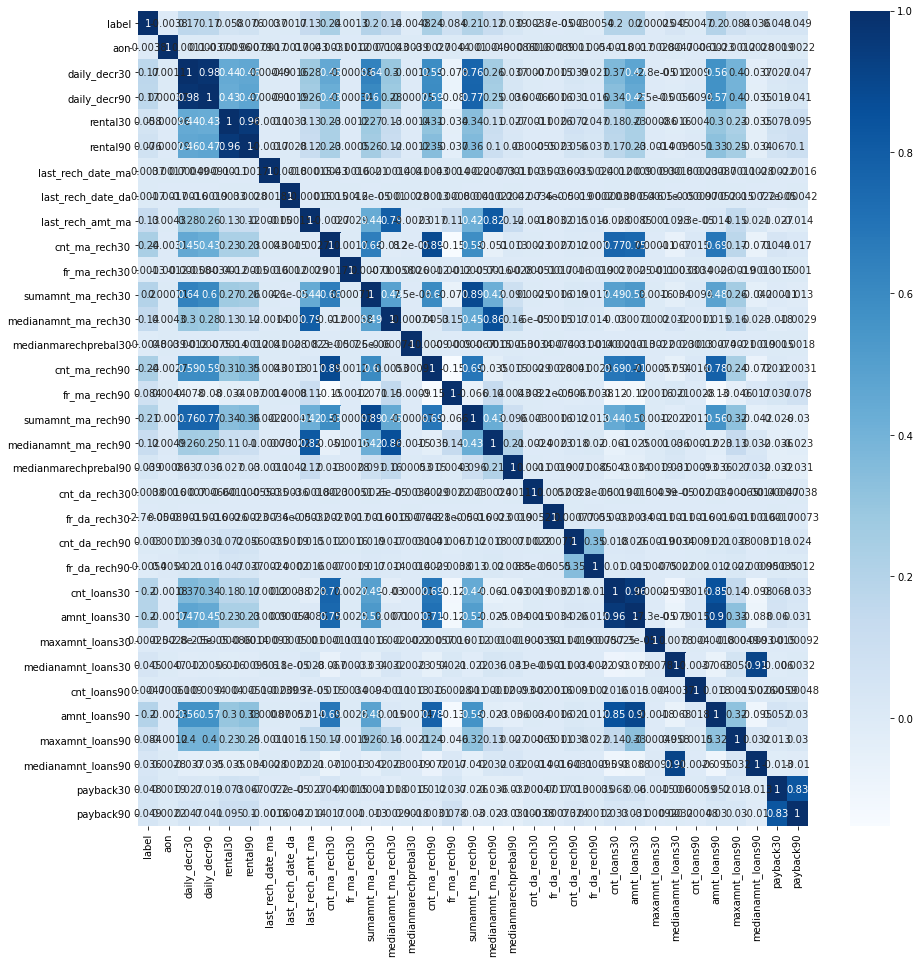

In [21]:
dfcor=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(dfcor,cmap='Blues',annot=True)

<AxesSubplot:xlabel='aon', ylabel='Density'>

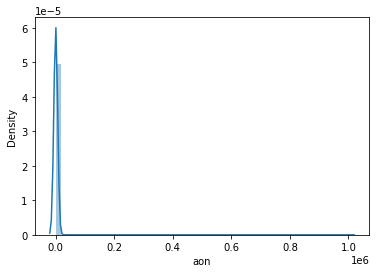

In [22]:
sns.distplot(df['aon'])

<AxesSubplot:xlabel='daily_decr30', ylabel='Density'>

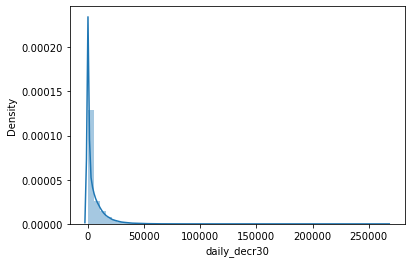

In [23]:
sns.distplot(df['daily_decr30'])

<AxesSubplot:xlabel='daily_decr90', ylabel='Density'>

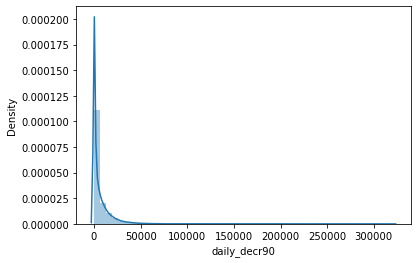

In [24]:
sns.distplot(df['daily_decr90'])

<AxesSubplot:xlabel='rental30', ylabel='Density'>

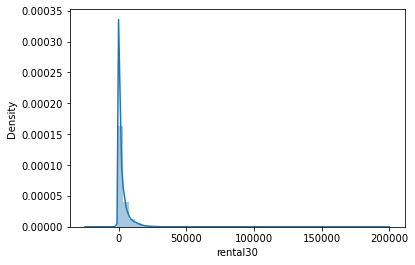

In [25]:
sns.distplot(df['rental30'])

<AxesSubplot:xlabel='last_rech_date_ma', ylabel='Density'>

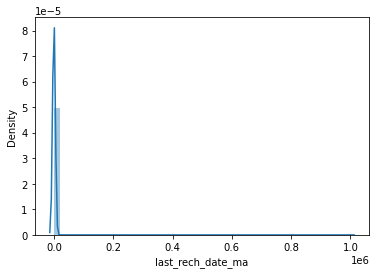

In [26]:
sns.distplot(df['last_rech_date_ma'])

<AxesSubplot:xlabel='last_rech_date_da', ylabel='Density'>

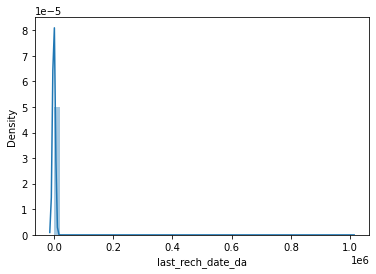

In [27]:
sns.distplot(df['last_rech_date_da'])

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='Density'>

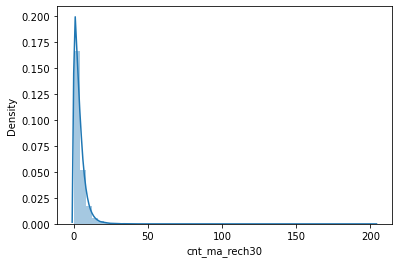

In [28]:
sns.distplot(df['cnt_ma_rech30'])

<AxesSubplot:xlabel='fr_ma_rech30', ylabel='Density'>

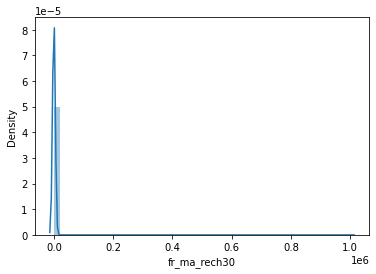

In [29]:
sns.distplot(df['fr_ma_rech30'])

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='Density'>

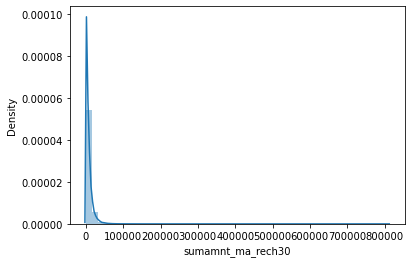

In [30]:
sns.distplot(df['sumamnt_ma_rech30'])

<AxesSubplot:xlabel='medianamnt_ma_rech30', ylabel='Density'>

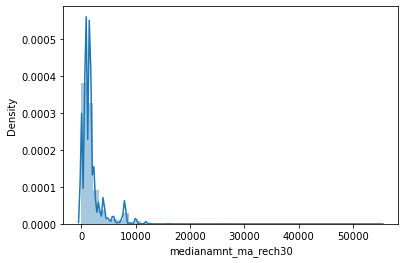

In [31]:
sns.distplot(df['medianamnt_ma_rech30'])

<AxesSubplot:xlabel='medianmarechprebal30', ylabel='Density'>

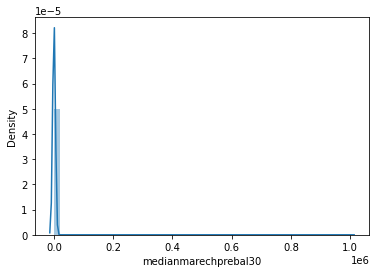

In [32]:
sns.distplot(df['medianmarechprebal30'])

<AxesSubplot:xlabel='cnt_ma_rech90', ylabel='Density'>

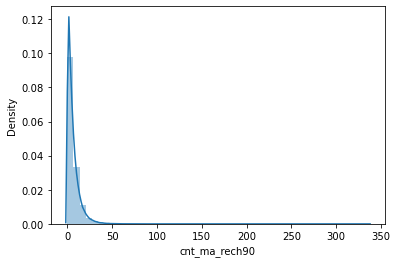

In [33]:
sns.distplot(df['cnt_ma_rech90'])

<AxesSubplot:xlabel='fr_ma_rech90', ylabel='Density'>

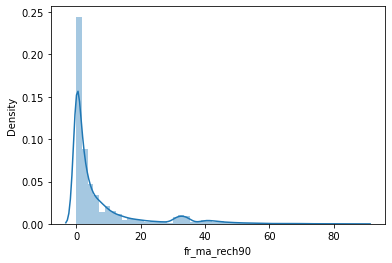

In [34]:
sns.distplot(df['fr_ma_rech90'])

<AxesSubplot:xlabel='sumamnt_ma_rech90', ylabel='Density'>

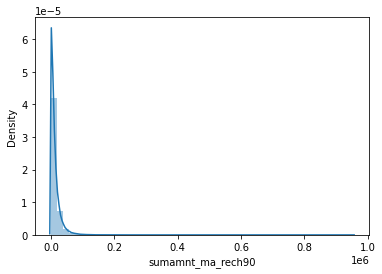

In [35]:
sns.distplot(df['sumamnt_ma_rech90'])

<AxesSubplot:xlabel='medianamnt_ma_rech90', ylabel='Density'>

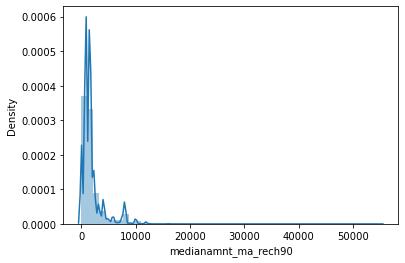

In [36]:
sns.distplot(df['medianamnt_ma_rech90'])

<AxesSubplot:xlabel='medianmarechprebal90', ylabel='Density'>

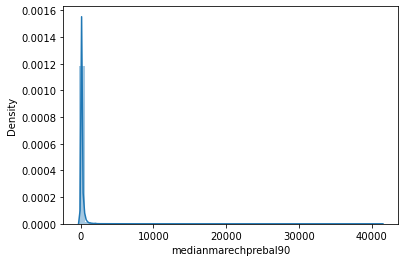

In [37]:
sns.distplot(df['medianmarechprebal90'])

<AxesSubplot:xlabel='cnt_da_rech30', ylabel='Density'>

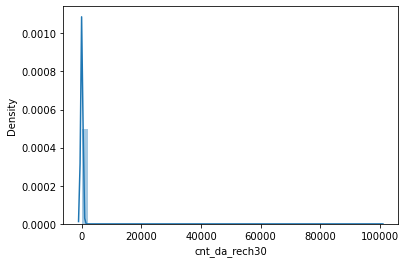

In [38]:
sns.distplot(df['cnt_da_rech30'])

<AxesSubplot:xlabel='fr_da_rech30', ylabel='Density'>

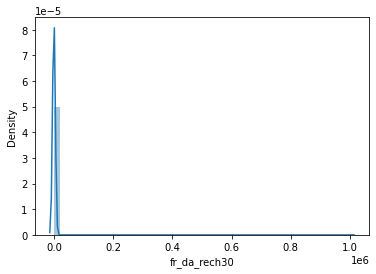

In [39]:
sns.distplot(df['fr_da_rech30'])

<AxesSubplot:xlabel='cnt_da_rech90', ylabel='Density'>

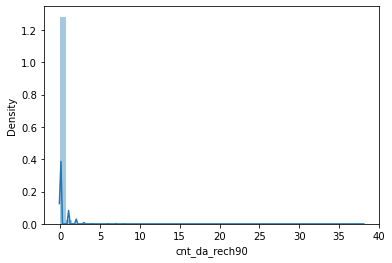

In [40]:
sns.distplot(df['cnt_da_rech90'])

<AxesSubplot:xlabel='medianamnt_loans30', ylabel='Density'>

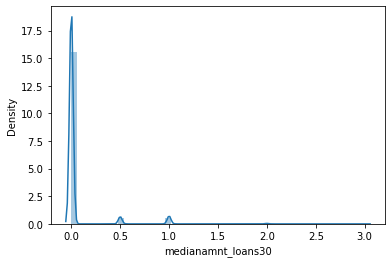

<AxesSubplot:xlabel='cnt_loans90', ylabel='Density'>

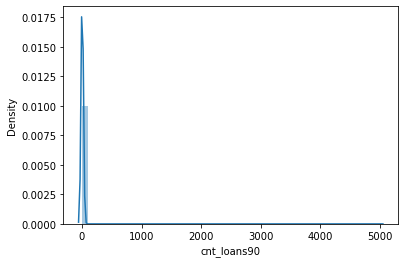

<AxesSubplot:xlabel='amnt_loans90', ylabel='Density'>

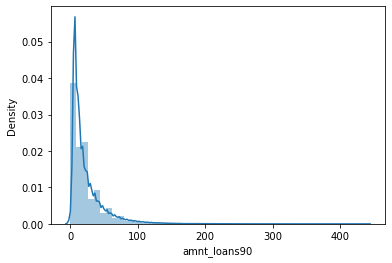

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='Density'>

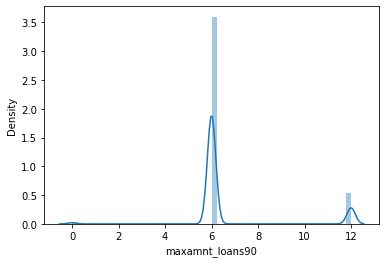

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='Density'>

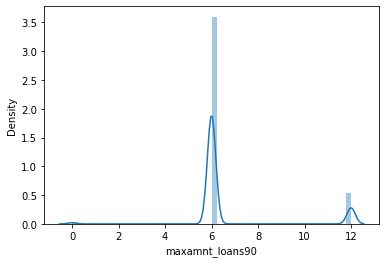

<AxesSubplot:xlabel='label'>

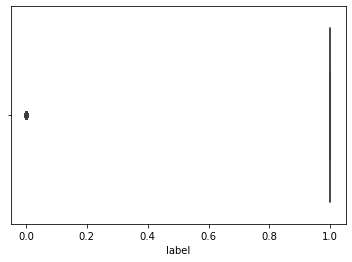

<AxesSubplot:xlabel='aon'>

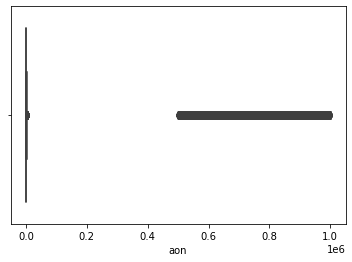